# Universal Approximation Theorem

Universal Approximation Theorem이란 1개의 비선형 Activation함수를 포함하고 있는 히든 레이어를 가진 Neural Network를 이용해 어떠한 함수든 근사시킬 수 있다는 이론.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
def func(x):
    """
    근사시키려는 함수
    """
    return 7*np.sin(x)*np.cos(x)*(2*x**2+5*x**3+x**2)*np.tan(x)+120 

In [3]:
# >> 우리는 아래의 x,y만 알고, 위의 함수를 찾으려는 것.
x = np.linspace(-10, 10, 100)
y = func(x)

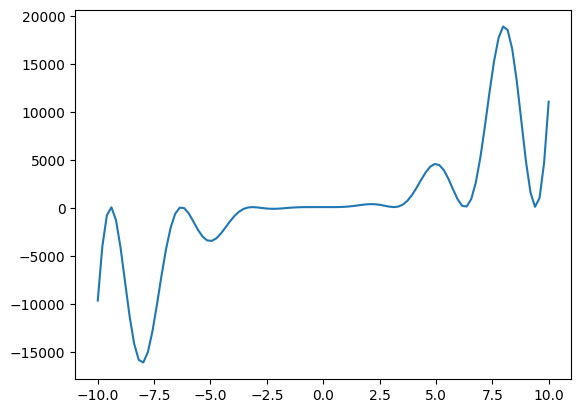

In [4]:
plt.plot(x, y)
plt.show()

위의 함수 f(x)를 모른다고 생각하고 x와 y만 알고있을때, Linear에 비선형함수 하나만 넣으면 근사치를 구할 수 있다는 이론을 통해 위의 그래프와 비슷하게 나오는지 아래에서 구해보자.

즉 위의 함수는 정답이고, 우리는 X와y를 아래처럼 모델을 통해 근사치를 정말 구하는지 알아볼것이다.

In [13]:
X_train = torch.tensor(x, dtype=torch.float32).unsqueeze(dim=1).to(device)
y_train = torch.tensor(y, dtype=torch.float32).unsqueeze(dim=1).to(device)

X_train.shape, y_train.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [21]:
# 모델
# >>> X값을 넣으면 Sequential함수가 Linear, ReLU, Linear를 순서대로 넣어주면서 학습한다.
# >>> 여기서 넣어준 하나의 비선형함수는 ReLU
model = nn.Sequential(
    nn.Linear(1, 10000),
    nn.ReLU(),
    # nn.Sigmoid(), # logistic
    nn.Linear(10000, 1)
).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)

In [22]:
# 학습
model.train()
for epoch in range(5000  ):
    # 추론
    pred = model(X_train)
    # 오차
    loss = loss_fn(pred, y_train)
    # grandient
    loss.backward()
    # 파라미터 업데이트
    optimizer.step()
    # 파라미터 초기화
    optimizer.zero_grad()
print("완료")

완료


In [23]:
y_pred = model(X_train)

In [24]:
y_pred.shape

torch.Size([100, 1])

In [25]:
# >>> 위의 결과는 shape이 2차원이다! 이걸 그래프그리기 위해서는 1차원으로 바꿔줘야한다. 1차원으로 바꾸기 위한 아래과정!
# y_pred값을 ndarray로 변환
## 1. device를 cpu로 이동. >>> 우리는 지금 gpu가 없어서 cpu에 있지만, gpu있는 컴퓨터에선 어딨는지 모를것이므로!
## 2. grad_fn 있는 경우 제거. grad_fn있으면 numpy로 못바꾸기 때문문
y_pred_array = y_pred.to("cpu").detach().numpy().flatten()

In [26]:
y_pred_array.shape #>>>1차원이 됨

(100,)

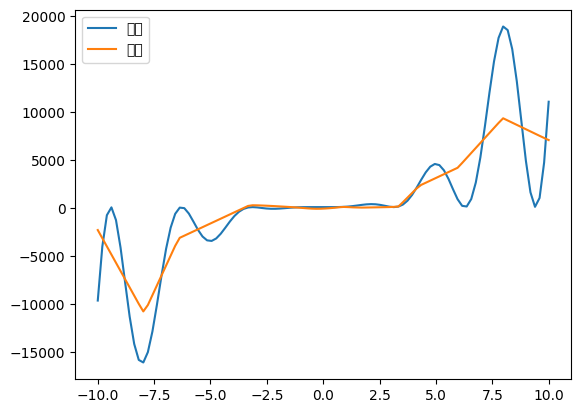

In [27]:
plt.plot(x, y, label="정답")
plt.plot(x, y_pred_array, label="추론")
plt.legend()
plt.show()

# 얼추 근사한걸 볼 수 있다.
# 최초의 ReLU를 주석처리하여 Linear함수 두개만으로 모델 학습시킨경우를 보면, 얼추 맞는 추세선은 찾지만 결국 직선꼴 밖에 나오지 않아 underfitting 된 것이다.
# ReLu 대신에 nn.Sigmoid()를 넣어보면, 거의 일치하게 나온다! Sigmoid는 layer가 길게되면 성능이 낮을뿐이지, sigmoid 자체는 성능이 좋다.